# __Наилучшее квадратичное приближение__
Благодарность за помошь в лабораторной работе выражается @[Impervguin](https://github.com/Impervguin/Computational-algorithms/tree/main/Task4)

# Библиотеки

In [1]:
import copy
import numpy as np
from matplotlib import pyplot as plt

from src.data_funcs import *

import src.ODE as ODE
from src.least_squares_2D import least_square_2D, fgraph_2D
from src.least_squares_3D import least_square_3D, fgraph_3D

# Одномерная апроксимация

## Получение данных

__Формат значений__
| $ x_i $ | $ y_i $ | $ w_i $ |
|:-------:|:-------:|:-------:|

$ w_i $ - вес точки

In [2]:
FILENAME2D = "data/data2D/tmp41"

table_2D = fread_2Ddata(FILENAME2D)
print_data(table_2D)

0) 0.0 1.0 0 100.0
1) 2.5 -0.048 0 7.0
2) 5.0 -0.178 0 5.0
3) 7.5 0.266 0 0.1
4) 10.0 -0.246 0 100.0


## Вывод графиков

I: 0.00829822172029602


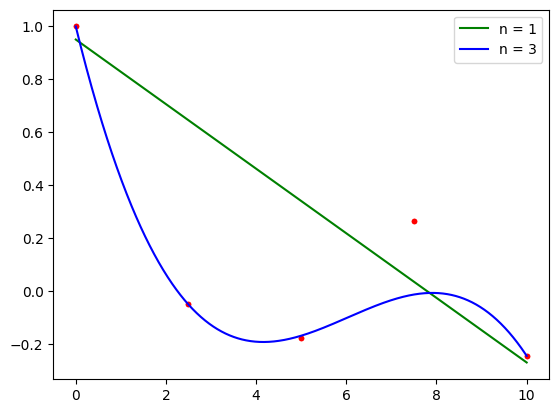

In [3]:
N1_2D, N2_2D = 1, 3

fgraph_2D(least_square_2D(table_2D, N1_2D), table_2D, color='green', label=f"n = {N1_2D}")
fgraph_2D(least_square_2D(table_2D, N2_2D, print_err=True), table_2D, color='blue', label=f"n = {N2_2D}")

# Двумерная апроксимация

## Получение данных

__Формат значений__
| $ x_i $ | $ y_i $ | $ z_i $ | $ w_i $ |
|:-------:|:-------:|:-------:|:-------:|

$ w_i $ - вес точки

In [4]:
FILENAME3D = "data/data3D/tmp43"

table_3D = fread_3Ddata(FILENAME3D)
print_data(table_3D)

0) -2.0 -1.0 -10.0 2.0
1) -2.0 0.0 -12.0 8.0
2) -2.0 1.0 -12.0 7.0
3) -2.0 2.0 -10.0 6.0
4) -1.0 -1.0 -3.0 0.0
5) -1.0 0.0 -4.0 3.0
6) -1.0 1.0 -3.0 6.0
7) -1.0 2.0 0.0 1.0
8) 0.0 -1.0 -0.0 6.0
9) 0.0 0.0 0.0 9.0
10) 0.0 1.0 2.0 3.0
11) 0.0 2.0 6.0 6.0
12) 1.0 -1.0 -1.0 3.0
13) 1.0 0.0 0.0 1.0
14) 1.0 1.0 3.0 1.0
15) 1.0 2.0 8.0 0.0
16) 2.0 -1.0 -6.0 0.0
17) 2.0 0.0 -4.0 4.0
18) 2.0 1.0 0.0 5.0
19) 2.0 2.0 6.0 3.0


# Вывод графиков

I: 1079.6301031730582
I: 1.8038941095300515e-28


<Axes3D: xlabel='OX', ylabel='OY', zlabel='OZ'>

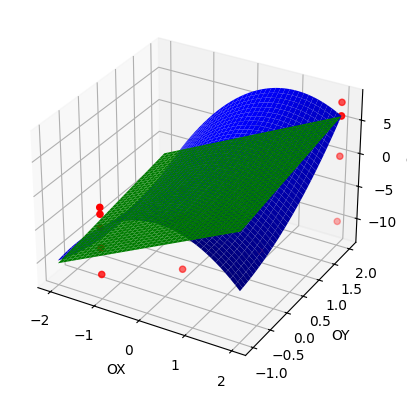

In [5]:
N1_3D, N2_3D = 1, 2

axes = fgraph_3D(least_square_3D(table_3D, N1_3D, print_err=True), table_3D, color='green')
fgraph_3D(least_square_3D(table_3D, N2_3D, print_err=True), table_3D, color='blue', axes=axes)

# Приближенное решение дифференциального уравнения

## Уравнение

$$ y'' + xy + y = 2x $$
$$ y(0) = 1, y(1) = 0 $$
$$ y(x) = u_0(x) + \sum_{k = 1}^{m}C_k u_k(x) $$

## Решение

$$
С_0(x) + a_1C_1(x) + a_2C_2(x) + \ldots = 0 (2x) \\
- \\
R=|C_0(x)+\ldots+0| \\
I = \int_{x_0}^{x_1} R^2(x_i) \to min (невязка) \\
- \\
\begin{cases}
\frac{\partial I}{\partial a_1} = 0 \\
\ldots \\
\frac{\partial I}{\partial a_n} = 0
\end{cases} \\
- \\
\frac{\partial I}{\partial a_1} = \frac{\partial (\sum^{n}(С_0(x) + a_1C_1(x) + a_2C_2(x) + \ldots))^2}{\partial a_1} = 2 \sum^{n}(С_1(x))(C_0(x) + a_1C_1(x) + a_2C_2(x) + \ldots) = 0 \\
$$

[m = 2]: (1 - x) + 0.006 x (1 - x) + -0.312 x^2 (1-x)
[m = 3]: (1 - x) + -0.314 x (1 - x) + -0.609 x^2 (1-x) + 0.173 x^3 (1 - x)


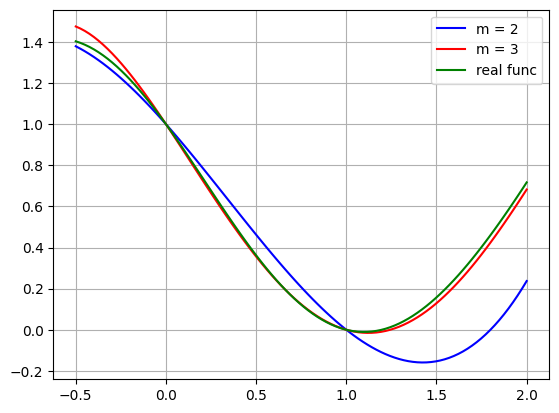

In [6]:
x = np.linspace(-0.5, 2, 100)
y = [ODE.ODESolution(xi) for xi in x]

x_aprox = np.linspace(-0.5, 2, 100)
f_2, c_2 = ODE.ApproximateODE(x_aprox, 2, ODE.funcs[0:3], ODE.cfuncs[0:3])
f_3, c_3 = ODE.ApproximateODE(x_aprox, 3, ODE.funcs, ODE.cfuncs)

print(f"[m = 2]: (1 - x) + {c_2[0]:.3f} x (1 - x) + {c_2[1]:.3f} x^2 (1-x)")
print(f"[m = 3]: (1 - x) + {c_3[0]:.3f} x (1 - x) + {c_3[1]:.3f} x^2 (1-x) + {c_3[2]:.3f} x^3 (1 - x)")

y_2 = [f_2(xi) for xi in x]
y_3 = [f_3(xi) for xi in x]

plt.grid(True)

plt.plot(x, y_2, color="blue", label="m = 2")
plt.plot(x, y_3, color="red", label="m = 3")
plt.plot(x, y, color="green", label="real func")

plt.legend()